# K-means Algorithm

**Name**: ZHU GUANGYU  
**Student ID**: 20165953  
**Github Repo**: [assignment03](https://github.com/z1ggy-o/cv_assignment/tree/master/assignment03)  

---

## Clustering

the goal of *clustering* is to group or partition the vectors into *k* groups or clusters, with the vectors in each group close to each other.

the best clustering:
- can find the best slustering, if the representatives are fixed;
- can find the vest representatives, if the clustering is fixed.

We use a single number to judge a choice of clustering, along with a choice of the group. We define:

$$
J^{clust}=(||x_{1}-z_{c_{1}}||^{2}+ \cdots +||x_{N}-z_{c_{N}}||^{2})/N
$$

Here $x_{N}$ is vector, $z_{c_{N}}$ is correspond representatives. We call this value *energy* or *cost*.

### When representatives fixed

We assign each date vector $x_{i}$ to its nearest representatives. Since the representatives are fixed, we actually re-grouped vectors into different partitions. We have:
$$ ||x_{i}-z_{c_{i}}|| = \min_{j=1,\cdots\,k}||x_{i}-z_{c_{i}}|| $$ 

This gives us the minimum $J^{clust}$.

### When group assignment fixed

This means the element vectors of each group are fixed. We need to find the group representatives to minimize our cost $J^{clust}$.

Simply, choose the average of the vectros in its group:
$$ z_{j} = (1/|G_{j}|)\sum_{i\in G_{j}}x_{i}$$

since this makes the sum of distance between points and its representative minimum.

## *k*-means Algorithm

Previous two methods can help us get the best clustering. But the two methods are depend on each other. To solve this problem, we can use *k-means algorithm*.

*k-means algorithm*'s idea is simple. We repeatedly alternate between updating the group assignments, then updating the representatives. In each iteration we get a better $J^{clust}$ until the step does not change the choice.

Have to be aware of is k-means algorithm **cannot** guarantee that the partition it finds minimizes $J^{clust}$. Commonly, we run it several times with different initial representatives, and choose the one with the smallest cost.

There is another problem is to determin the optimal number of clusters (here is the *k*).  
If you have given number of clusters, that's fine. If you don't, there are few methods can help us:
- [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_%28clustering%29 )
- [The silhouette method](https://en.wikipedia.org/wiki/Silhouette_%28clustering%29)
- [Gap statistic](http://web.stanford.edu/~hastie/Papers/gap.pdf)

---


## Implementation

Now, let's try implement the algorithm.

---

First, import some packages.  
- `numpy` for scientific computing
- `matplotlib` for visualization
- `math` is the python build in math packages.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import math

---

Create a class call `KMeans` to combine the functions we need together.

Here we define `__init__` function to receive 3 arguments:
- `k` is number of clusters we want.
- `num_points` is the number of random points we want to generate.
- `num_dims` is the dimention of the data. Default value is 2 (point)

In [8]:
class KMeans:
    """k-means algorithm

    generate random 2d points,
    group these points into k clusters
    """

    def __init__(self, k=3, num_points=100, num_dims=2):
        """Constructer
        
        Parameters:
            k(int): number of clusters we want
            num_points: number of random points we want to generate
            num_dims: the dimention of the data (for point, is 2)
        """
        
        self.k = k
        self.num_points = num_points
        self.num_dims = num_dims
        self.energy_history = []
        self.points = []
        self.centroids = []
        self.colors = list(cm.rainbow(np.linspace(0, 1, k)))
        self.clusters = []
        for _ in range(k):
            self.clusters.append([])

---

Define some getter function at here.  
Most of them are for visualization.

> Because the code be seperated into different cells,
> I need to add some extra codes to bind them together,
> just after the `# for juypter notebook` command, You
> do not need them when run this code at local.

In [29]:
    def getNumOfClusters(self):
        return self.k

    def getColors(self):
        return self.colors

    def getEnergyHistory(self):
        return self.energy_history

    def getPoints(self):
        return self.points

    def getClusters(self):
        return self.clusters

    def getCentroids(self):
        return self.centroids
    
# for jupyter notebook
KMeans.getNumOfClusters = getNumOfClusters
KMeans.getColors = getColors
KMeans.getEnergyHistory = getEnergyHistory
KMeans.getPoints = getPoints
KMeans.getClusters = getClusters
KMeans.getCentroids = getCentroids

---

Define the trigger function.  

There are different way to determine when to stop the iteration.  
Here we run the algorithm until the energy not change.

In practice, often stops the algorithm earlier, as soon as the
improvement becomes very small.

Here we seperate the trigger function and the cluster function
to make the future modification easier.

In [10]:
    def run(self):
        """Run algorithm

        Repeatly assign labels to points and compute new centroids.
        Iterate until the energy of the result not change.
        """

        energy_prev = 0
        energy_thisTurn = self._computeEnergy()  # initialization result
        while(energy_thisTurn != energy_prev):
            energy_prev = energy_thisTurn
            energy_thisTurn = self._clustering()
            
# for jupyter notebook
KMeans.run = run

About **energy** computation, like we said previously, use function:
$$
J^{clust}=(||x_{1}-z_{c_{1}}||^{2}+ \cdots +||x_{N}-z_{c_{N}}||^{2})/N
$$


In [11]:
    def _computeEnergy(self):
        """ Compute the cost of the clustering result

        Return:
            energy(float): the energy of this clustering.
        """

        energy = 0
        for i in range(len(self.centroids)):
            centroid = self.centroids[i]
            part_energy = 0
            for point in self.clusters[i]:
                part_energy += (
                    math.pow(self._computeDistance(point, centroid), 2)
                )
            energy += part_energy
        energy = energy / len(self.points)
        self.energy_history.append(energy)

        return energy
    
# for jupyter notebook
KMeans._computeEnergy = _computeEnergy

---

Define the initialization function.

This function will:
1. Generate random points
2. Assign label to each points
3. Randomly move each cluster
4. Compute centroids

We seperate each step to different function.

In [12]:
    def generatePointCluster(self):
            """Generate random points

            1. Generate random points
            2. Randomly assign label to each points
            3. Disperse points by cluster one more time
            4. Compute the initial centroids
            """

            self._generatePoints()
            self._initialLabel()
            self._dispersePoints()
            self._computeCentroid()
            
# for jupyter notebook
KMeans.generatePointCluster = generatePointCluster

Depends on the `num_points` and `num_dims`, we use `numpy`'s `random`
function to generate the random data set, then put them into a `points`
list.

In [13]:
    def _generatePoints(self):
            randoms = np.random.rand(self.num_points, self.num_dims)
            for x, y in randoms:
                point = [int(x*100), int(y*100)]
                self.points.append(point)
                
# for jupyter notebook
KMeans._generatePoints = _generatePoints

For intialing labels, we just simply do it in order.

In [14]:
    def _initialLabel(self):
            for i in range(len(self.points)):
                index = i % self.k
                self.clusters[index].append(self.points[i])
                
# for jupyter notebook
KMeans._initialLabel = _initialLabel

To make data set looks clusters, we move each cluster of a random offset.

In [15]:
    def _dispersePoints(self):
            # move each cluster's point with random offset
            for i in range(self.k):
                x_off = np.random.randint(-50, 50)
                y_off = np.random.randint(-50, 50)
                points_moved = []
                for x, y in self.clusters[i]:
                    points_moved.append([x+x_off, y+y_off])
                self.clusters[i] = points_moved

            # update result back to points list
            new_points = []
            for i in range(self.k):
                for point in self.clusters[i]:
                    new_points.append(point)
            self.points = new_points
            
# for jupyter notebook
KMeans._dispersePoints = _dispersePoints

For centroid computing, here we just use each cluster's *mean* value
as the centroid.

In [16]:
    def _computeCentroid(self):
            """ Compute each groups centroid then update self.controids """

            new_centroids = []
            for cluster in self.clusters:
                x_cod = [point[0] for point in cluster]
                y_cod = [point[1] for point in cluster]

                centroid_x = int(sum(x_cod)/len(x_cod))
                centroid_y = int(sum(y_cod)/len(y_cod))
                
                new_centroids.append([centroid_x, centroid_y])

            self.centroids = new_centroids
            
# for jupyter notebook
KMeans._computeCentroid = _computeCentroid

---

Now, let's define the iteration part.

Since at the intialization part we've already did once label assignment and centroids computation. In the iteration part, we just repeat on this order.

 A thing have to be aware of is, some time there will have empty
 cluster be generated. If empty cluster occurs, we just remove it.
 That means the number of clusters may not always equal to the `k`
 that we give to the `__init__` function.
 
 Label assignment and centroids computation are also seperated into
 different functions.

In [17]:
    def _clustering(self):
        """Run algorithm one iteration

        Return:
            energy: This iteration's result energy
        """

        self._assignLabel()
        # After re-grouping if there are any empty cluster, delete it from 
        # list also delete corresponding centroid.
        for i in range(len(self.clusters)):
            if (len(self.clusters[i]) == 0):
                self.clusters.pop(i)
                self.centroids.pop(i)
                self.colors.pop(i)
        self._computeCentroid()
        energy = self._computeEnergy()

        return energy
    
# for jupyter notebook
KMeans._clustering = _clustering

To assign label to points. Compute the distance between each point with
all centroids, find the closest one, then move it into that centroid's
cluster.

After all computation, update the `clusters` list.

In [18]:
    def _assignLabel(self):
        """ Assign labels to points for generating new groups

        Compute distance between each point with each centroid,
        assign it to the closest centroid's group.
        """

        # for each point, compute the distance, get the closest centroid
        # generate k new cluster
        new_clusters = []
        for _ in range(len(self.clusters)):
            new_clusters.append([])

        for point in self.points:
            min = math.inf
            closest = 0
            # find the closest centroid
            for i in range(len(self.centroids)):
                dist = self._computeDistance(point, self.centroids[i])
                if dist < min:
                    min = dist
                    closest = i
            # put point into new group
            new_clusters[closest].append(point)

        self.clusters = new_clusters
        
# for jupyter notebook
KMeans._assignLabel = _assignLabel

For computing distances, we use `numpy`'s `linalg.norm` directly, it gives us the *Euclidean distance* between two vectors.

In [19]:
    def _computeDistance(self, x, y):
        """Compute the distance between two points

        root of (x1-x2)^2 + (y1-y2)^2
        """

        a = np.array(x)
        b = np.array(y)

        return np.linalg.norm(a - b)
    
# for jupyter notebook
KMeans._computeDistance = _computeDistance

---

Above is the end of the algorithm part.

Next, we define some functions to visualise the result.

In [37]:
# Function to plot the result of the result, both clusters and centroids
def plotGraph(kmeans):
    """Plot current clustering result"""

    plt.title('k-means')
    plt.xlabel('X')
    plt.ylabel('Y')

    for i in range(len(kmeans.clusters)):
        for x, y in kmeans.clusters[i]:
            plt.scatter(x, y, marker='.', color=kmeans.colors[i])
        x_centroid = kmeans.centroids[i][0]
        y_centroid = kmeans.centroids[i][1]
        plt.scatter(
            x_centroid,
            y_centroid,
            marker='s',
            s=100,
            color=kmeans.colors[i])
    plt.show()


# Input data plotting
def plotInputData(data):
    """Plot the randomly generated points from KMeans

    Parameter:
        data(list): a list of 2d vectors
    """

    plt.title('Input Data')
    plt.xlabel('X')
    plt.ylabel('Y')

    for x, y in data:
        plt.scatter(x, y, color='black', marker='.')
    plt.show()


# Plot the labeled clusters
def plotLabel(kmeans):
    """Plot initial clusters"""

    plt.title('Label')
    plt.xlabel('X')
    plt.ylabel('Y')

    for i in range(kmeans.getNumOfClusters()):
        clusters = kmeans.getClusters()
        colors = kmeans.getColors()
        for x, y in clusters[i]:
            plt.scatter(x, y, marker='.', color=colors[i])
    plt.show()

    
# Plot each iteration's energy
def plotEnergy(data):
    """Plot energy history

    Parameter:
        data(list): a list of energy
    """

    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    plt.title('Energy Variation')
    plt.xlabel('Iteration')
    plt.ylabel(r'$J^{clust}$')
    plt.xticks(range(len(data)+1))

    ite = [i for i in np.arange(1, len(data)+1, 1)]
    plt.plot(ite, data, 'o-', color='b')
    plt.show()

## Result

We have done all the implementation, let's check the result togher.

First try `k=3, num_points=100'

Input Data:


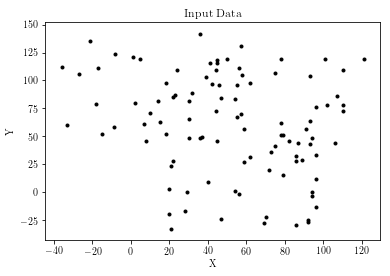


Initial Label:


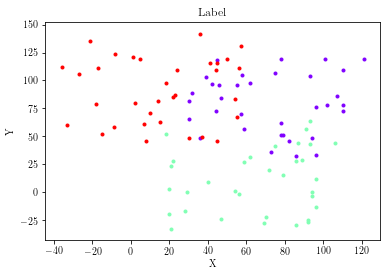


Initial Centroids:


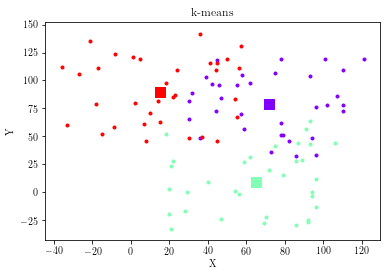


Final Label:


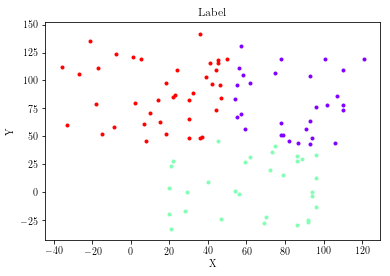


Final Centroids:


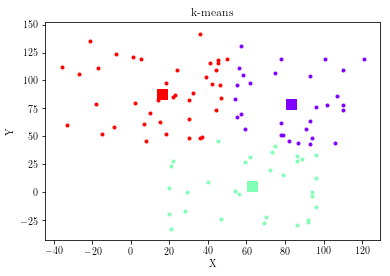


Energy change:


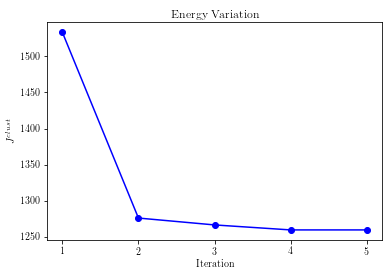

In [38]:
if __name__ == '__main__':
    kmeans_1 = KMeans(3, 100)
    kmeans_1.generatePointCluster()
    print('Input Data:')
    plotInputData(kmeans_1.getPoints())  # input data
    print('\nInitial Label:')
    plotLabel(kmeans_1)  # initial label
    print('\nInitial Centroids:')
    plotGraph(kmeans_1)  # initial centroids

    kmeans_1.run()
    
    print('\nFinal Label:')
    plotLabel(kmeans_1)  # final label
    print('\nFinal Centroids:')
    plotGraph(kmeans_1)  # final result
    print('\nEnergy change:')
    plotEnergy(kmeans_1.getEnergyHistory())


---

Let's try some other inputs:
`k` = 5, `num_points` = 300

Input Data:


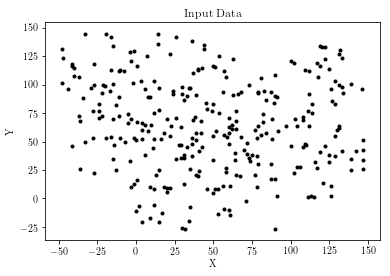


Initial Label:


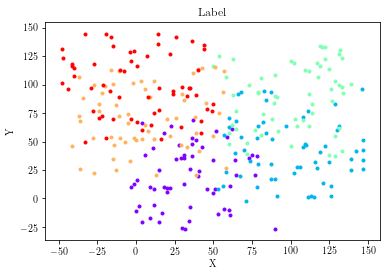


Initial Centroids:


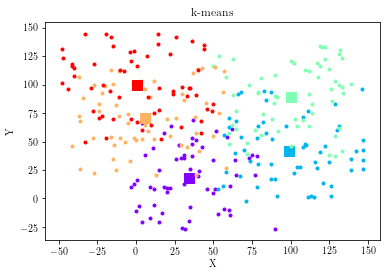


Final Label:


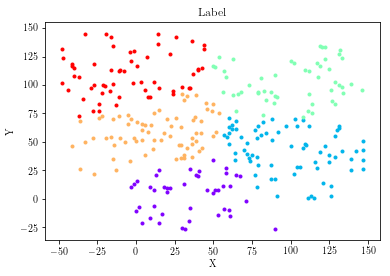


Final Centroids:


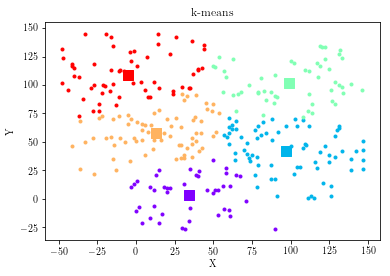


Energy change:


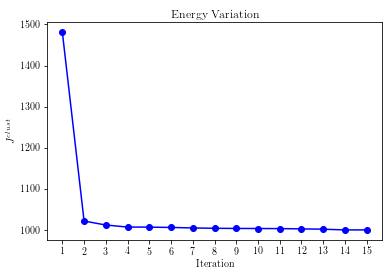

In [40]:
kmeans_2 = KMeans(5, 300)
kmeans_2.generatePointCluster()
print('Input Data:')
plotInputData(kmeans_2.getPoints())  # input data
print('\nInitial Label:')
plotLabel(kmeans_2)  # initial label
print('\nInitial Centroids:')
plotGraph(kmeans_2)  # initial centroids

kmeans_2.run()

print('\nFinal Label:')
plotLabel(kmeans_2)  # final label
print('\nFinal Centroids:')
plotGraph(kmeans_2)  # final result
print('\nEnergy change:')
plotEnergy(kmeans_2.getEnergyHistory())

From above example, we can find the energy of each iteration is going down, and at some point the value won't
change again.